In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
# Load the data
players_df = pd.read_csv('Data/players.csv')

# Display basic information
print("Dataset shape:", players_df.shape)
print("\nColumns in the dataset:")
print(players_df.columns.tolist())
print("\nData types:")
print(players_df.dtypes)

# Display first few rows
players_df.head()

Dataset shape: (32601, 23)

Columns in the dataset:
['player_id', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name', 'image_url', 'url', 'current_club_domestic_competition_id', 'current_club_name', 'market_value_in_eur', 'highest_market_value_in_eur']

Data types:
player_id                                 int64
first_name                               object
last_name                                object
name                                     object
last_season                               int64
current_club_id                           int64
player_code                              object
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [11]:
# Calculate missing values
missing_values = players_df.isnull().sum()
missing_percentage = (missing_values / len(players_df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display only columns with missing values
missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)

,Missing Values,Percentage
agent_name,16019,49.136530
contract_expiration_date,12091,37.087819
country_of_birth,2799,8.585626
foot,2536,7.778902
city_of_birth,2455,7.530444
height_in_cm,2256,6.920033
first_name,2062,6.324959
market_value_in_eur,1523,4.671636
highest_market_value_in_eur,1523,4.671636
country_of_citizenship,383,1.174811


Market Value Statistics:
count    3.107800e+04
mean     1.639685e+06
std      6.407293e+06
min      1.000000e+04
25%      1.000000e+05
50%      2.500000e+05
75%      7.000000e+05
max      2.000000e+08
Name: market_value_in_eur, dtype: float64


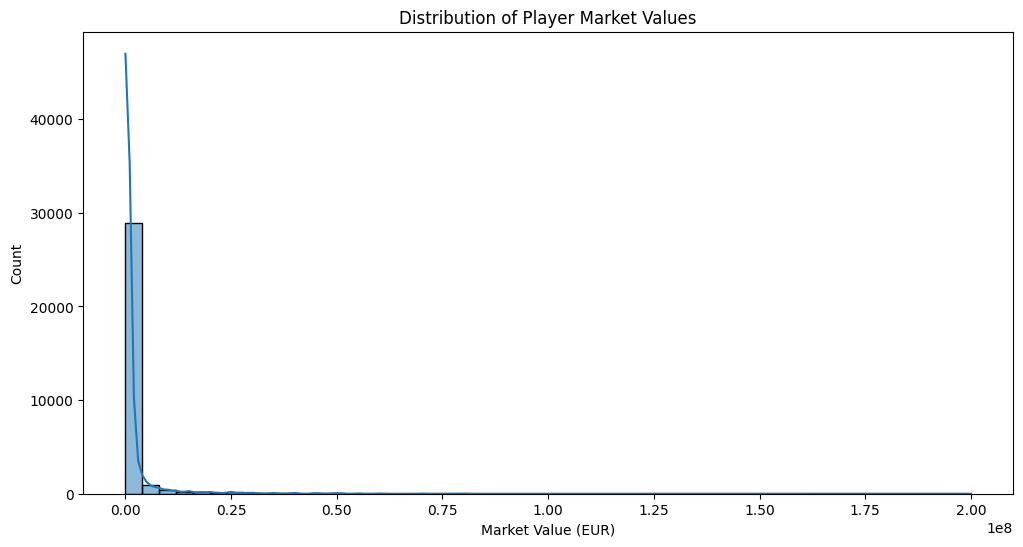

In [12]:
# Market value statistics
market_value_stats = players_df['market_value_in_eur'].describe()
print("Market Value Statistics:")
print(market_value_stats)

# Visualize market value distribution
plt.figure(figsize=(12, 6))
sns.histplot(players_df['market_value_in_eur'], bins=50, kde=True)
plt.title('Distribution of Player Market Values')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Count')
plt.show()

In [13]:
# Get top 10 players by market value
top_players = players_df.nlargest(10, 'market_value_in_eur')
top_players[['first_name', 'last_name', 'market_value_in_eur', 'current_club_name']]

,first_name,last_name,market_value_in_eur,current_club_name
19985,NaN,Vinicius Junior,200000000.0,Real Madrid Club de Fútbol
21637,Erling,Haaland,200000000.0,Manchester City Football Club
25766,Jude,Bellingham,180000000.0,Real Madrid Club de Fútbol
31174,NaN,Lamine Yamal,180000000.0,Futbol Club Barcelona
18778,Kylian,Mbappé,170000000.0,Real Madrid Club de Fútbol
22069,Bukayo,Saka,150000000.0,Arsenal Football Club
25728,Jamal,Musiala,140000000.0,FC Bayern München
26145,Florian,Wirtz,140000000.0,Bayer 04 Leverkusen Fußball
19513,NaN,Rodri,130000000.0,Manchester City Football Club
19863,Federico,Valverde,130000000.0,Real Madrid Club de Fútbol


Age Statistics:
count    32554.000000
mean        30.270513
std          6.635553
min         15.644079
25%         25.108830
50%         29.690623
75%         34.735113
max         56.750171
Name: age, dtype: float64


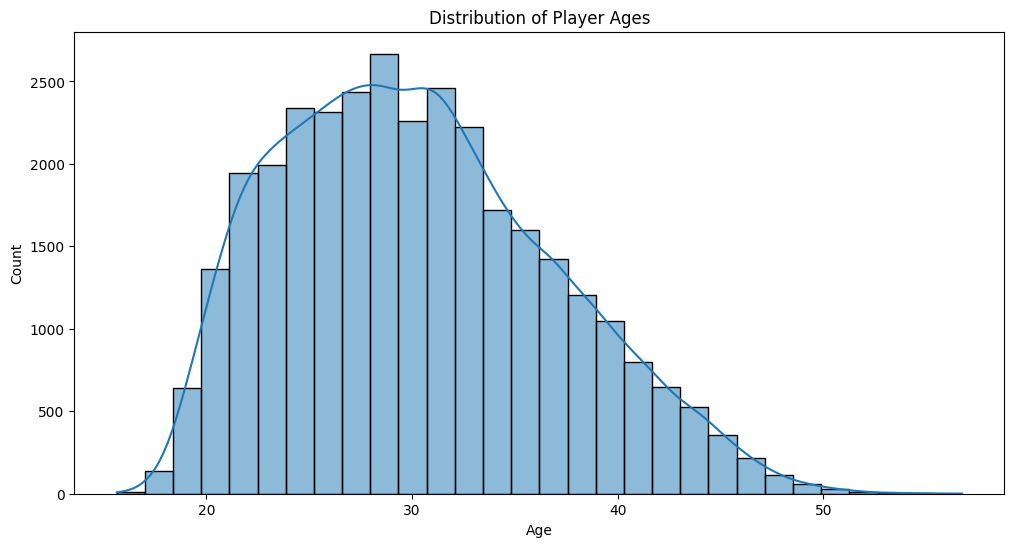

In [14]:
# Calculate player ages
players_df['age'] = (pd.to_datetime('today') - pd.to_datetime(players_df['date_of_birth'])).dt.days / 365.25

# Display age statistics
print("Age Statistics:")
print(players_df['age'].describe())

# Visualize age distribution
plt.figure(figsize=(12, 6))
sns.histplot(players_df['age'], bins=30, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Top 10 Clubs by Total Player Market Value:
current_club_name
Manchester City Football Club        1.374875e+09
Real Madrid Club de Fútbol           1.325525e+09
Arsenal Football Club                1.178225e+09
Futbol Club Barcelona                1.153525e+09
Liverpool Football Club              1.100275e+09
Paris Saint-Germain Football Club    1.058800e+09
Chelsea Football Club                1.017575e+09
FC Bayern München                    9.257750e+08
Tottenham Hotspur Football Club      8.844500e+08
Manchester United Football Club      7.701000e+08
Name: market_value_in_eur, dtype: float64


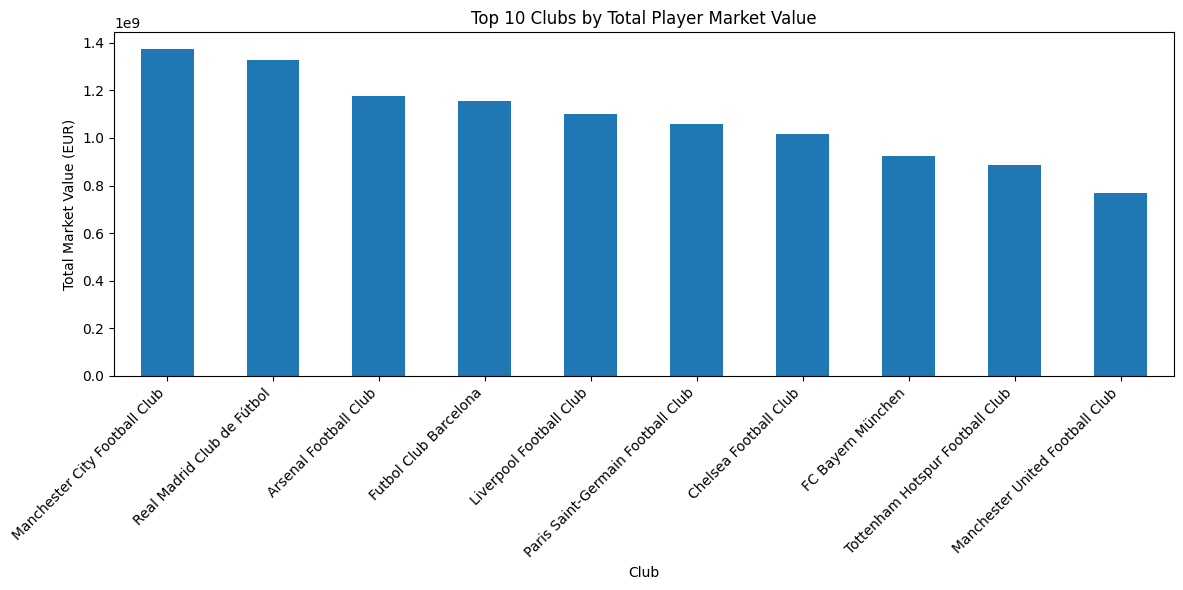

In [15]:
# Calculate total market value by club
club_values = players_df.groupby('current_club_name')['market_value_in_eur'].sum().sort_values(ascending=False).head(10)

# Display top 10 clubs
print("Top 10 Clubs by Total Player Market Value:")
print(club_values)

# Visualize club values
plt.figure(figsize=(12, 6))
club_values.plot(kind='bar')
plt.title('Top 10 Clubs by Total Player Market Value')
plt.xlabel('Club')
plt.ylabel('Total Market Value (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

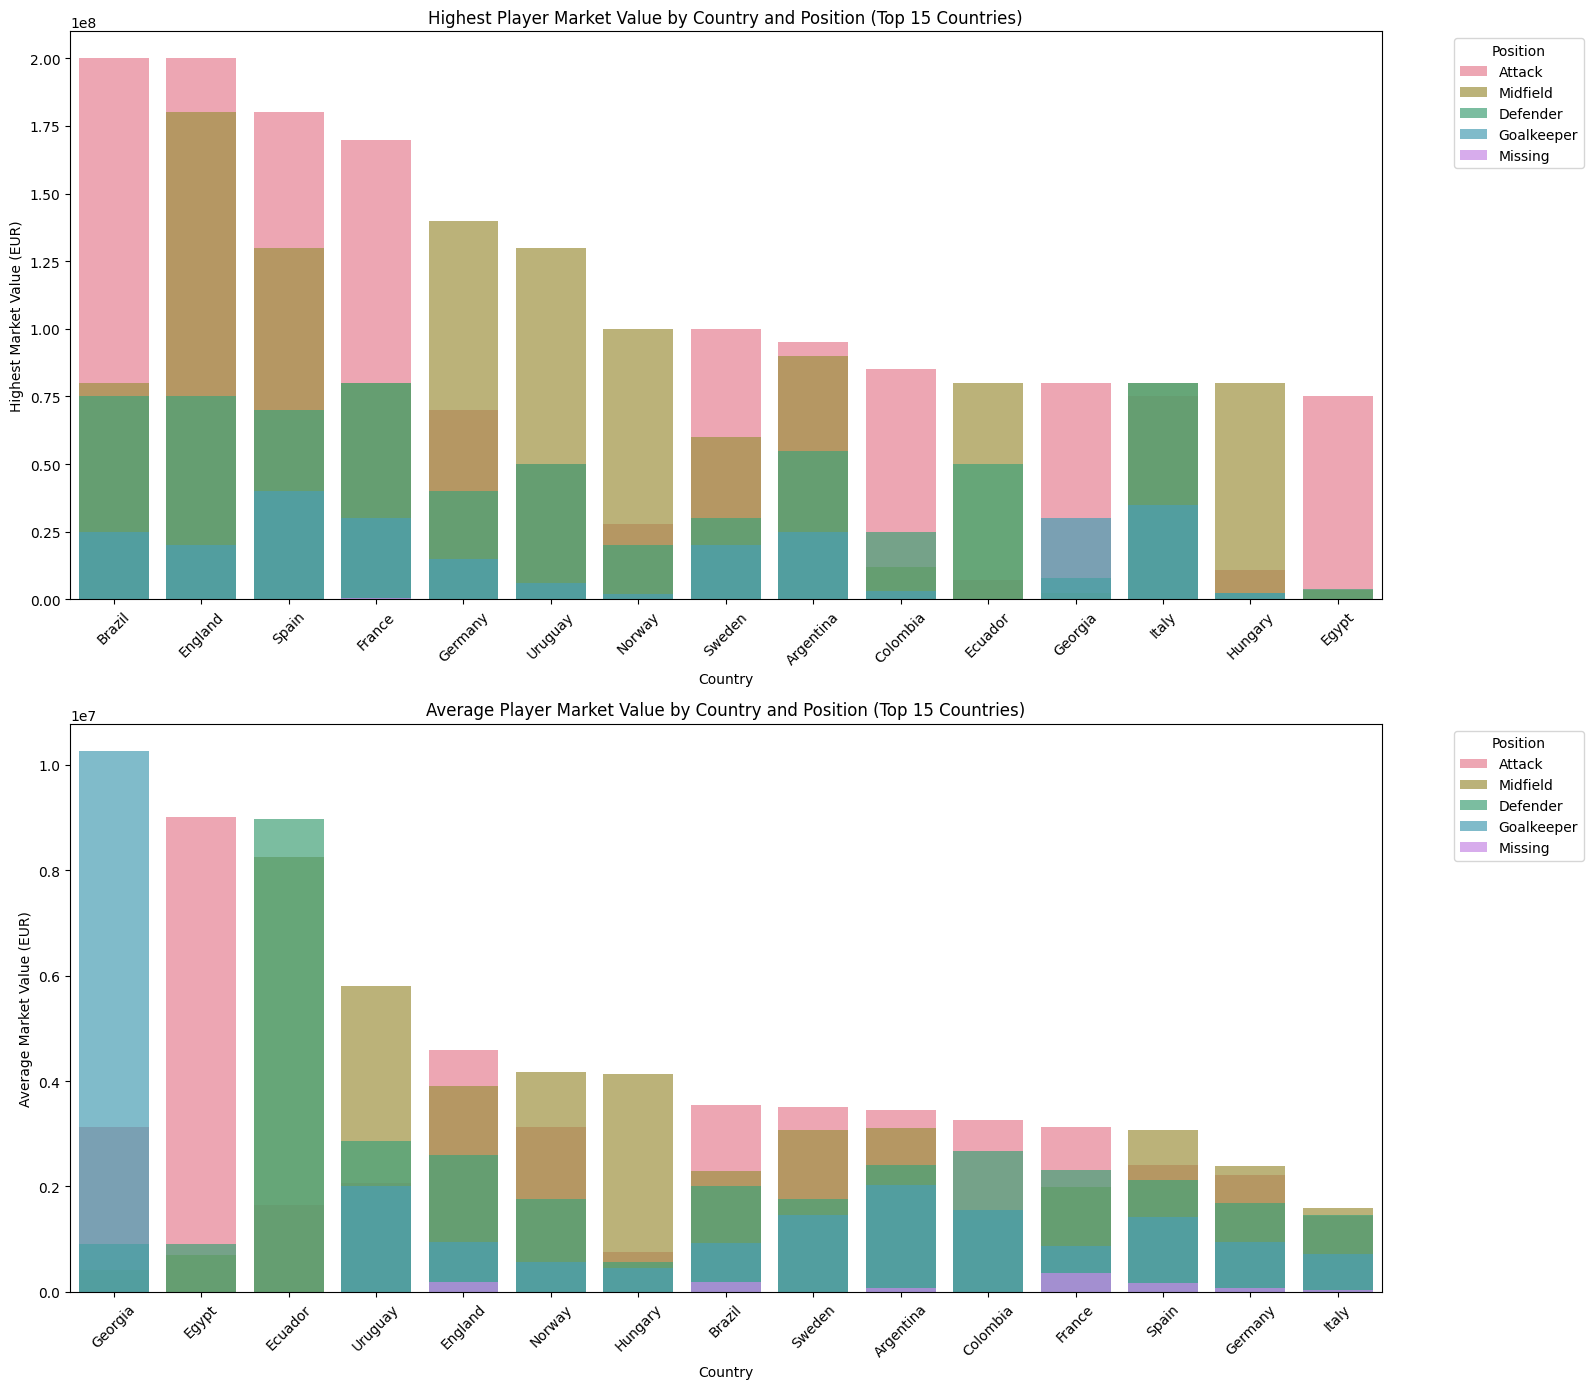


Detailed Statistics by Country and Position (Sorted by Highest Market Value):

Brazil:
Highest Market Value: 200,000,000 EUR
Average Market Value: 2,472,747 EUR

Breakdown by Position (Sorted by Highest Value):
                    mean          max
position                             
Attack      3.539353e+06  200000000.0
Midfield    2.301974e+06   80000000.0
Defender    2.002564e+06   75000000.0
Goalkeeper  9.333333e+05   25000000.0
Missing     1.833333e+05     300000.0

England:
Highest Market Value: 200,000,000 EUR
Average Market Value: 3,350,052 EUR

Breakdown by Position (Sorted by Highest Value):
                    mean          max
position                             
Attack      4.589661e+06  200000000.0
Midfield    3.910424e+06  180000000.0
Defender    2.598758e+06   75000000.0
Goalkeeper  9.379464e+05   20000000.0
Missing     1.916667e+05     225000.0

Spain:
Highest Market Value: 180,000,000 EUR
Average Market Value: 2,368,076 EUR

Breakdown by Position (Sorted by Highes

In [16]:
# Get the top 15 countries by highest market value
top_countries = players_df.groupby('country_of_birth')['market_value_in_eur'].max().sort_values(ascending=False).head(15).index

# Filter data for top countries
top_countries_data = players_df[players_df['country_of_birth'].isin(top_countries)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))

# Create a color palette for positions
position_palette = sns.color_palette("husl", len(top_countries_data['position'].unique()))

# Calculate the highest value for each position in each country
position_max_values = top_countries_data.groupby(['country_of_birth', 'position'])['market_value_in_eur'].max().unstack()

# Sort positions by their maximum value across all countries
position_order = position_max_values.max().sort_values(ascending=False).index

# Sort countries by their highest market value
country_order = position_max_values.max(axis=1).sort_values(ascending=False).index

# Plot 1: Highest Market Value by Country with Position Colors
for position in position_order:
    if position in position_max_values.columns:
        sns.barplot(x=position_max_values.loc[country_order].index, 
                    y=position_max_values.loc[country_order][position], 
                    color=position_palette[list(position_order).index(position)],
                    label=position,
                    alpha=0.7,
                    ax=ax1)

ax1.set_title('Highest Player Market Value by Country and Position (Top 15 Countries)')
ax1.set_xlabel('Country')
ax1.set_ylabel('Highest Market Value (EUR)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Average Market Value by Country with Position Colors
# Calculate average values for each position in each country
position_avg_values = top_countries_data.groupby(['country_of_birth', 'position'])['market_value_in_eur'].mean().unstack()

# Sort countries by their highest average market value
country_avg_order = position_avg_values.max(axis=1).sort_values(ascending=False).index

# Plot each position's data in order of highest to lowest value
for position in position_order:
    if position in position_avg_values.columns:
        sns.barplot(x=position_avg_values.loc[country_avg_order].index, 
                    y=position_avg_values.loc[country_avg_order][position], 
                    color=position_palette[list(position_order).index(position)],
                    label=position,
                    alpha=0.7,
                    ax=ax2)

ax2.set_title('Average Player Market Value by Country and Position (Top 15 Countries)')
ax2.set_xlabel('Country')
ax2.set_ylabel('Average Market Value (EUR)')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display detailed statistics sorted by highest market value
print("\nDetailed Statistics by Country and Position (Sorted by Highest Market Value):")
for country in country_order:
    country_data = top_countries_data[top_countries_data['country_of_birth'] == country]
    print(f"\n{country}:")
    print(f"Highest Market Value: {country_data['market_value_in_eur'].max():,.0f} EUR")
    print(f"Average Market Value: {country_data['market_value_in_eur'].mean():,.0f} EUR")
    print("\nBreakdown by Position (Sorted by Highest Value):")
    position_stats = country_data.groupby('position')['market_value_in_eur'].agg(['mean', 'max']).sort_values('max', ascending=False)
    print(position_stats)

Highest Player Market Value Analysis (Top Graph):
Top 3 Countries:
Brazil leads with the highest total market value, with significant contributions from attackers and defenders
England follows closely, with midfielders having the highest value contribution
Spain ranks third, showing a balanced distribution across attackers, midfielders, and defenders
Position Distribution:
Attackers (pink) tend to have the highest market values in most countries
Midfielders (tan) show strong values particularly in England and Germany
Defenders (green) contribute significantly in several countries, notably Brazil and France
Goalkeepers (blue) generally have lower market values across all countries
Average Player Market Value Analysis (Bottom Graph):
Top 3 Countries by Average Value:
Georgia shows the highest average value, particularly driven by goalkeeper values
Egypt follows with high average values for attackers
Ecuador shows strong average values for defenders
Interesting Observations:
The average values show a different ranking compared to the highest values
Some countries that rank high in total market value (like Brazil and England) rank lower in average values
Position value distribution varies significantly between countries
Smaller football nations can have high average values due to individual star players
Notable Patterns:
There's a significant drop in average values after the top 3-4 countries
The distribution of values across positions is more varied in the average value graph
Some countries show specialization in certain positions (e.g., Georgia with goalkeepers, Egypt with attackers)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
def load_data():
    try:
        players_df = pd.read_csv('Data/players.csv')
        return players_df
    except FileNotFoundError:
        print("Error: Could not find the data file. Please ensure Data/players.csv is in the correct location.")
        return None

players_df = load_data()

if players_df is not None:
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(2, 2)
    
    # Plot 1: Distribution of players by last_season
    ax1 = fig.add_subplot(gs[0, :])
    season_counts = players_df['last_season'].value_counts().sort_index()
    
    bars = ax1.bar(season_counts.index, season_counts.values)
    ax1.set_title('Distribution of Players by Last Season', fontsize=16)
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Number of Players')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Plot 2: Distribution of players by last_season and position
    ax2 = fig.add_subplot(gs[1, 0])
    position_season = players_df.groupby(['last_season', 'position']).size().unstack()
    position_season.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Player Distribution by Position and Season')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('Number of Players')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(title='Position', bbox_to_anchor=(1.05, 1))
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Market value distribution by season
    ax3 = fig.add_subplot(gs[1, 1])
    season_values = players_df.groupby('last_season')['market_value_in_eur'].agg(['mean', 'median', 'max'])
    season_values['mean'] = season_values['mean'] / 1000000  # Convert to millions
    season_values['median'] = season_values['median'] / 1000000
    season_values['max'] = season_values['max'] / 1000000
    
    season_values.plot(kind='line', ax=ax3, marker='o')
    ax3.set_title('Market Value Trends by Season')
    ax3.set_xlabel('Season')
    ax3.set_ylabel('Market Value (million euros)')
    ax3.grid(True, alpha=0.3)
    ax3.legend(['Mean', 'Median', 'Max'])
    
    plt.tight_layout()
    plt.savefig('player_distribution_analysis.png')
    plt.close()
    
    # Print some statistics
    print("\nPlayer Distribution Statistics:")
    print(f"Total number of players: {len(players_df):,}")
    print(f"Number of seasons covered: {len(season_counts):,}")
    print("\nTop 5 seasons by player count:")
    print(season_counts.head())
    
    # Calculate and print position distribution
    position_dist = players_df['position'].value_counts()
    print("\nPosition Distribution:")
    print(position_dist)
    
    # Calculate and print market value statistics
    print("\nMarket Value Statistics by Season:")
    print(season_values.round(2))


Player Distribution Statistics:
Total number of players: 32,601
Number of seasons covered: 13

Top 5 seasons by player count:
last_season
2012    1679
2013    2115
2014    1704
2015    1713
2016    1918
Name: count, dtype: int64

Position Distribution:
position
Defender      10389
Midfield       9391
Attack         8921
Goalkeeper     3720
Missing         180
Name: count, dtype: int64

Market Value Statistics by Season:
             mean  median    max
last_season                     
2012         0.21    0.15    4.0
2013         0.21    0.12    9.0
2014         0.21    0.15    7.0
2015         0.24    0.15    7.5
2016         0.26    0.15   11.0
2017         0.31    0.15   20.0
2018         0.31    0.18   16.0
2019         0.39    0.20   22.0
2020         0.40    0.20   12.0
2021         0.58    0.25   16.0
2022         0.93    0.30   50.0
2023         1.24    0.40   55.0
2024         6.07    1.50  200.0


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
def load_data():
    try:
        players_df = pd.read_csv('Data/players.csv')
        return players_df
    except FileNotFoundError:
        print("Error: Could not find the data file. Please ensure Data/players.csv is in the correct location.")
        return None

players_df = load_data()

if players_df is not None:
    # Create a single figure
    plt.figure(figsize=(15, 8))
    
    # Get the distribution of players by last_season
    season_counts = players_df['last_season'].value_counts().sort_index()
    
    # Create the bar plot
    bars = plt.bar(season_counts.index, season_counts.values, color='skyblue', edgecolor='black')
    
    # Customize the plot
    plt.title('Player Distribution by Season', fontsize=16, pad=20)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Number of Players', fontsize=12)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom',
                fontsize=9)
    
    # Customize the grid and ticks
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xticks(rotation=45, ha='right')
    
    # Add a trend line
    x = np.array(season_counts.index)
    y = np.array(season_counts.values)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", linewidth=2, label='Trend')
    
    # Add legend
    plt.legend()
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('player_distribution_graph.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Print statistics
    print("\nPlayer Distribution Statistics:")
    print(f"Total number of players: {len(players_df):,}")
    print(f"Number of seasons covered: {len(season_counts):,}")
    print("\nTop 5 seasons by player count:")
    print(season_counts.head())
    print("\nBottom 5 seasons by player count:")
    print(season_counts.tail())
    
    # Calculate and print trend statistics
    trend_slope = z[0]
    print(f"\nTrend Analysis:")
    print(f"Average change per season: {trend_slope:.2f} players")
    if trend_slope > 0:
        print("The number of players is increasing over time")
    else:
        print("The number of players is decreasing over time")


Player Distribution Statistics:
Total number of players: 32,601
Number of seasons covered: 13

Top 5 seasons by player count:
last_season
2012    1679
2013    2115
2014    1704
2015    1713
2016    1918
Name: count, dtype: int64

Bottom 5 seasons by player count:
last_season
2020    2168
2021    2337
2022    2643
2023    4054
2024    6419
Name: count, dtype: int64

Trend Analysis:
Average change per season: 243.12 players
The number of players is increasing over time


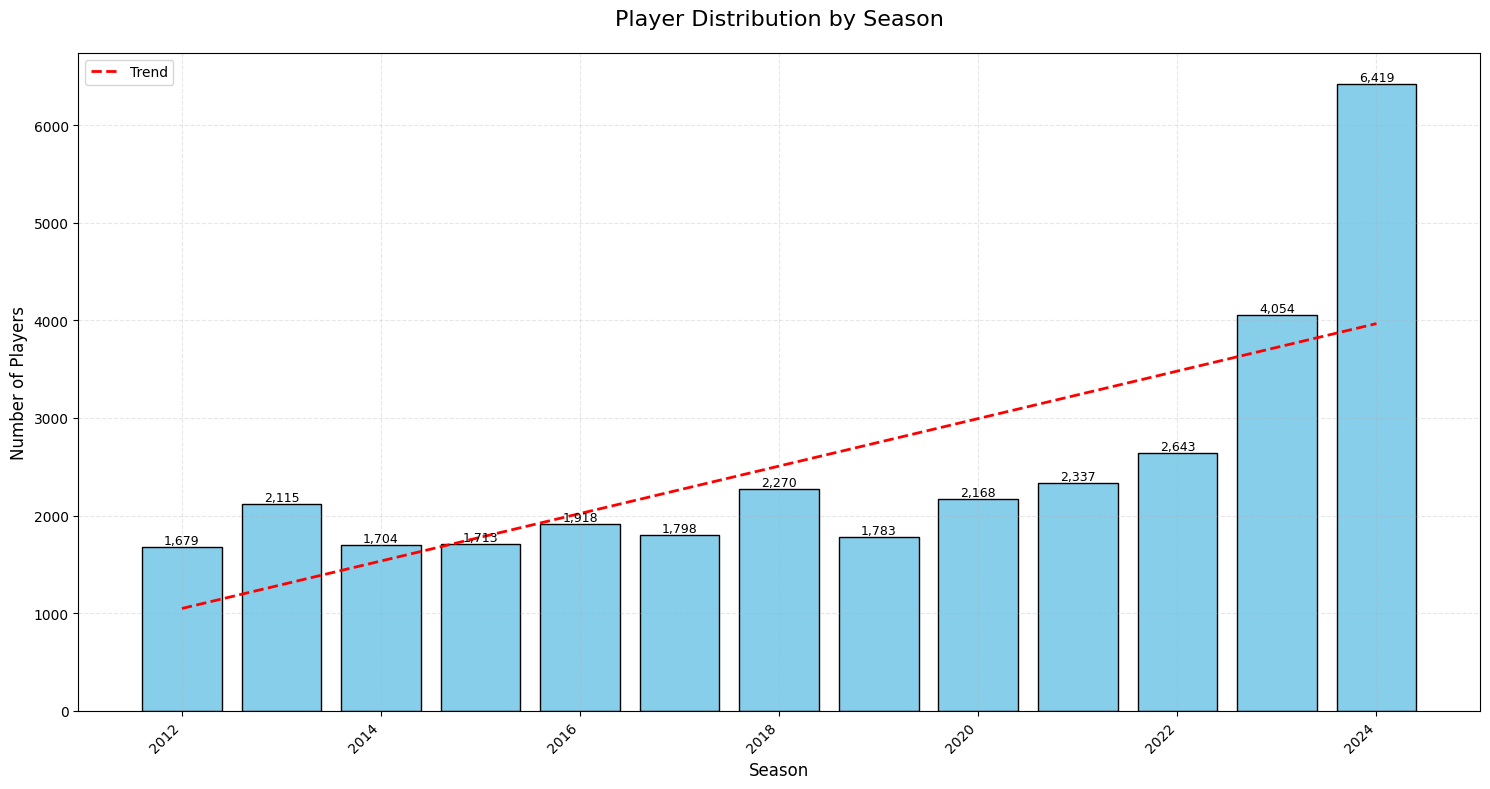


Player Distribution Statistics:
Total number of players: 32,601
Number of seasons covered: 13

Top 5 seasons by player count:
last_season
2012    1679
2013    2115
2014    1704
2015    1713
2016    1918
Name: count, dtype: int64

Bottom 5 seasons by player count:
last_season
2020    2168
2021    2337
2022    2643
2023    4054
2024    6419
Name: count, dtype: int64

Trend Analysis:
Average change per season: 243.12 players
The number of players is increasing over time

Position Distribution:
position
Defender      10389
Midfield       9391
Attack         8921
Goalkeeper     3720
Missing         180
Name: count, dtype: int64

Market Value Statistics by Season:
             mean  median    max
last_season                     
2012         0.21    0.15    4.0
2013         0.21    0.12    9.0
2014         0.21    0.15    7.0
2015         0.24    0.15    7.5
2016         0.26    0.15   11.0
2017         0.31    0.15   20.0
2018         0.31    0.18   16.0
2019         0.39    0.20   22.0
20

In [24]:
players_df = load_data()

if players_df is not None:
    # Create a single figure
    plt.figure(figsize=(15, 8))
    
    # Get the distribution of players by last_season
    season_counts = players_df['last_season'].value_counts().sort_index()
    
    # Create the bar plot
    bars = plt.bar(season_counts.index, season_counts.values, color='skyblue', edgecolor='black')
    
    # Customize the plot
    plt.title('Player Distribution by Season', fontsize=16, pad=20)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Number of Players', fontsize=12)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom',
                fontsize=9)
    
    # Customize the grid and ticks
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xticks(rotation=45, ha='right')
    
    # Add a trend line
    x = np.array(season_counts.index)
    y = np.array(season_counts.values)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", linewidth=2, label='Trend')
    
    # Add legend
    plt.legend()
    
    # Adjust layout
    plt.tight_layout()
    
    # Display the plot in the notebook
    plt.show()
    
    # Print statistics
    print("\nPlayer Distribution Statistics:")
    print(f"Total number of players: {len(players_df):,}")
    print(f"Number of seasons covered: {len(season_counts):,}")
    print("\nTop 5 seasons by player count:")
    print(season_counts.head())
    print("\nBottom 5 seasons by player count:")
    print(season_counts.tail())
    
    # Calculate and print trend statistics
    trend_slope = z[0]
    print(f"\nTrend Analysis:")
    print(f"Average change per season: {trend_slope:.2f} players")
    if trend_slope > 0:
        print("The number of players is increasing over time")
    else:
        print("The number of players is decreasing over time")
    
    # Calculate and print position distribution
    position_dist = players_df['position'].value_counts()
    print("\nPosition Distribution:")
    print(position_dist)
    
    # Calculate and print market value statistics
    season_values = players_df.groupby('last_season')['market_value_in_eur'].agg(['mean', 'median', 'max'])
    season_values['mean'] = season_values['mean'] / 1000000  # Convert to millions
    season_values['median'] = season_values['median'] / 1000000
    season_values['max'] = season_values['max'] / 1000000
    
    print("\nMarket Value Statistics by Season:")
    print(season_values.round(2))